# Author Giovambattista Vieri
# (c) Giovambattista Vieri 2020 all rights reserved
# License GNU AFFERO GPL

In [3]:
!pip install selenium
!pip install FPDF
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

from PIL import Image
import sys
import json
import pandas as pd
from fpdf import FPDF


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
import time
from ipywidgets import widgets

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',options=chrome_options)




Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done


Label(value='Please insert url complete with http/https')

Button(description='proceed', style=ButtonStyle())

===== cookie/s for https://www.repubblica.it =====

               domain        expiry                                                                              name path
0      .repubblica.it  1.643111e+09  gig_bootstrap_3_1LA7c1Tgh8TOu8RyhRNltE6n6Avs4pEXj5bhyQNpnpC3KHJ60mcdJ6xOubYt6iUJ    /
1      .repubblica.it           NaN                                                                           wt_geid    /
2      .repubblica.it  1.616759e+09                                                                            wt_rla    /
3   www.repubblica.it  1.611577e+09                                                                         _cb_svref    /
4   www.repubblica.it  1.645703e+09                                                                               _cb    /
5   www.repubblica.it  1.645703e+09                                                                            _cb_ls    /
6   www.repubblica.it  1.645703e+09                                                    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

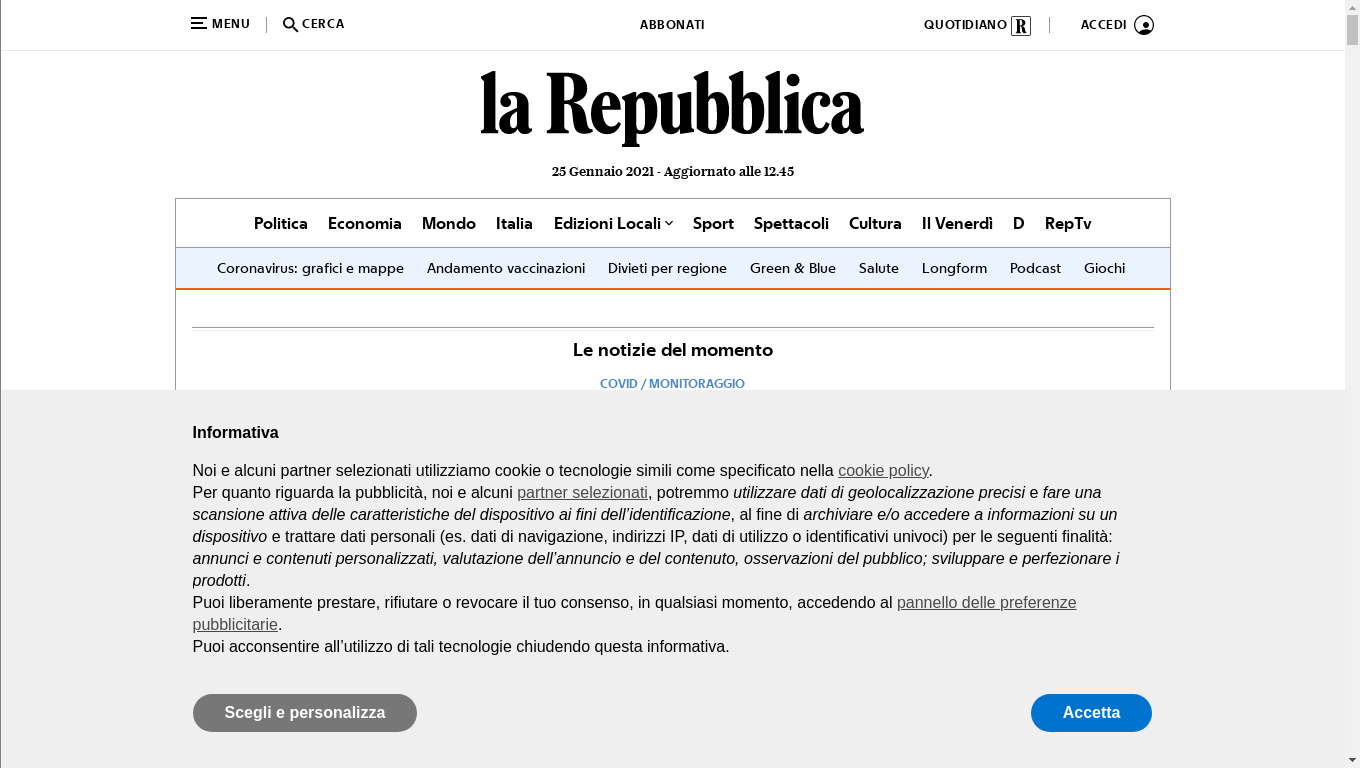

In [4]:
from ipywidgets import widgets
from urllib.parse import urlparse
from pprint import pprint
from io import BytesIO
from io import StringIO

colabflag=True
try: 
    from google.colab import files
except:
    colabflag=False

lbl1=widgets.Label('Please insert url complete with http/https')
dro1=widgets.Dropdown(options=['https://','http://'],value='https://')
txt1=widgets.Text(placeholder='insert valid url')
lbl2=widgets.Label('Cookie information selector')
lbl3=widgets.Label('   ')
lbl4=widgets.Label('Links information selector')
tog1=widgets.ToggleButton(value=False,description='secure',  tooltip='enable or disable in report')
tog2=widgets.ToggleButton(value=False,description='value',   tooltip='enable or disable in report')
tog3=widgets.ToggleButton(value=False,description='sameSite',tooltip='enable or disable in report')
tog4=widgets.ToggleButton(value=False,description='httpOnly',tooltip='enable or disable in report')
tog5=widgets.ToggleButton(value=False,description='cookies raw',tooltip='enable or disable in report')

tog10=widgets.ToggleButton(value=False,description='only domains',tooltip='enable or disable in report')
#tog11=widgets.ToggleButton(value=False,description='cookies raw',tooltip='enable or disable in report')
#tog12=widgets.ToggleButton(value=False,description='cookies raw',tooltip='enable or disable in report')

#accordion = widgets.Accordion(children=[tog1,tog2,tog3,tog4])
hbox1=widgets.HBox([dro1,txt1])
vbox0=widgets.VBox([lbl2,tog1,tog2,tog3,tog4,tog5, lbl3])
vbox1=widgets.VBox([lbl4,tog10,lbl3])
bttn1=widgets.Button(description='proceed')
def proceed(b):
    browser.set_window_size(1360,768)
    fo=open('report.txt','w')
    url=str(dro1.value)+str(txt1.value)
    browser.get(url)
    time.sleep(2)
    print (f"===== cookie/s for {url} =====\n")
    print (f"===== cookie/s for {url} =====\n",file=fo)
    cookies = browser.get_cookies()

    image = Image.open(BytesIO(browser.get_screenshot_as_png()))

 #   pprint(cookies)
    links=browser.find_elements_by_tag_name('link')
    cook=pd.DataFrame(cookies).reindex(['domain','expiry','name','path','secure','value','sameSite','httpOnly'],axis="columns")
    pd.set_option('display.max_columns', 1000)
    pd.set_option('display.width', 132)
 ###   pd.set_option('display.max_colwidth', 40)
 
#########    col0=['domain','expiry','name','path','secure','value','sameSite','httpOnly']
    col0=['domain','expiry','name','path']
    if(tog1.value):
        col0.append('secure')

    if(tog2.value):
        col0.append('value')

    if(tog3.value):
        col0.append('sameSite')

    if(tog4.value):
        col0.append('httpOnly')

    res=cook[col0]
    print(res)
    print(res,file=fo)
    if(tog5.value):
        for cookie in cookies:
            print("---- raw cookies ----\n")
            print("---- raw cookies ----\n",file=fo)
            print(cookie)
            print(cookie,file=fo)
    
    print(f"+++++ links/s for {url} ++++++\n")
    print(f"+++++ links/s for {url} ++++++\n",file=fo)
    listoflinks=[]

    for link in links:
        href = link.get_attribute('href')
        domain = urlparse(href).netloc

        if(tog10.value):
            listoflinks.append(domain)
        else:
            listoflinks.append(href)
    l=pd.DataFrame(list(dict.fromkeys(listoflinks)))
    l.columns=['domain/url']
    pd.set_option('max_colwidth', 132)
    print(l)
    print(l,file=fo)
    print(f"-----  end for {url} -----\n") 
    print(f"-----  end for {url} -----\n",file=fo) 
    if (colabflag):
        files.download('report.txt')

    display(image)

bttn1.on_click(proceed)
display(lbl1,hbox1,vbox0,vbox1,bttn1)

